# What is the Mood of the News today?

## Task:
For this project I chose to run a sentiment analysis on 12 news related Twitter accounts in order to check the mood of the news. Twleve news sites were split into 3 catagories and 75 tweets from each were pulled for a total of 900 data points. I chose 4 US news sites, 4 international sites, and 4 tabloids (just for fun).

|United States|International|Tabloid|
|-------------|-------------|-------|
|@FoxNews|@BBCWorld|@TheOnion|
|@NYTimes|@ABCaustralia|@NatEnquirer|
|@WashingtonPost|@Echinanews|@TMZ|
|@latimes|@The_Japan_News|@WeeklyWorldNews|


## Process
Using a variety of Python dependencies I was able to seek out current tweets using API's. Then, VADER analysis was used to check the mood of the posts. Eventhough Positive, Negative, and Neutral feeling were analyzed, I chose to use the Compound results for my graphs and analysis. I created and saved a CSV of the results and set up a DataFrame to view those resutls here in Jupyter Notebook. To visualize the many data points I set up a scatter plot with the 75 most recent tweets from each news outlet mapped to the x-axis and the compound score from the VADER analysis mapped on the y-axis. The compound score can be a -1 at the most negative, and a +1 for the absolute most positive tweet.
Also, a bar graph was set up to view the mean score for each news outlet (the scatter plot can be a lot to take in {900 points after all} so the bar graph may easier to visually digest). 



## Analysis:
The two days that I checked the mood showed US news trending negative, international trending positive, and the tabloids trending mostly neutral except for @NatEnquirer which was very negative on both days (I guess men pregnant with bat babies gets a low score). To get a more in depth (and meaningful) result from this excersise I could check the Mood of the News 
over a week, or month. 

In [1]:
# import dependencies

import time
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Twitter API keys (remote location)
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Set up VADER analysis

analyzer = SentimentIntensityAnalyzer()

# Set up Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# set up empty list to append to
news_mood = []

target_users = ("@FoxNews", "@NYTimes", "@WashingtonPost", "@latimes",
                "@BBCWorld", "@ABCaustralia", "@Echinanews", "@The_Japan_News",
                "@TheOnion", "@NatEnquirer", "@TMZ", "@WeeklyWorldNews")

# set up for loop to append to news_mood list
for user in target_users:
    
    # set counter
    row_counter = 1
    
    # set up API call 
    public_tweets = api.user_timeline(user, count = 75)
    
    # loops through all tweets
    for tweet in public_tweets:
        
        # VADER
        # the following line is the print statement for each tweet, toggle to view the intermediate data
       # print(f"{user} Tweet #{row_counter}: \n {tweet['text']} \n")
        compound = round(analyzer.polarity_scores(tweet["text"])["compound"],2)
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        tweet_ago = row_counter
        tweet_text = tweet["text"]

        # add sentiment for each tweet to sentiments list
        news_mood.append({"User": user,
                          "Date": tweet["created_at"],
                          "Compound": compound,
                          "Positive": pos,
                          "Negative": neg,
                          "Neutral": neu,
                          "Tweets Ago": row_counter,
                          "Tweet Text": tweet_text})
        row_counter += 1        
        

In [3]:
# set up DataFrame
columns = ["User", "Date", "Compound", "Positive", "Negative", "Neutral", "Tweet Text", "Tweets Ago"]
news_mood = pd.DataFrame(news_mood, columns = columns)
#news_mood.set_index("Tweets Ago")
# the following command displays the dataframe created, toggle to view the intermediate data
# news_mood

In [4]:
len(news_mood)

900

In [5]:
# export DataFrame to CSV file

# news_mood.to_csv("mood_images/Mood_of_News.csv", index = True)

# Visualization

## Scatter Plot

In [6]:
# Set up timestamp for plot titles, and view stamp
timestamp = datetime.now().strftime('%B %d %Y')
print(timestamp)

August 27 2018


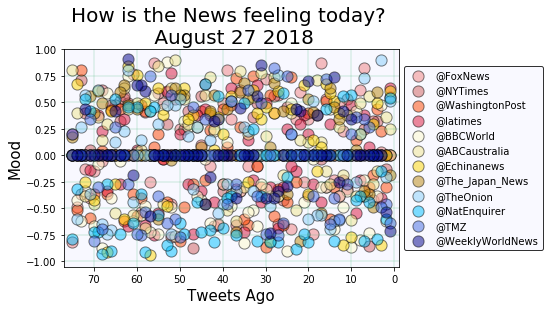

In [7]:
fig, ax = plt.subplots()

# set up grid lines and face color on graph
plt.grid(color = "mediumseagreen", linewidth = .25)
ax.set_facecolor("ghostwhite")

# add title, x axis label and y axis label
plt.title(f"How is the News feeling today? \n {timestamp}", fontsize = 20)
plt.xlabel("Tweets Ago", fontsize = 15)
plt.ylabel("Mood", fontsize = 15)

# set x axis range ** decending from most recent tweet (-1) back to last tweet (100)
plt.xlim(77,-1)

# set y axis range from most negative (-1) to most positive (1)
plt.ylim(-1.05,1)

color = ["lightcoral",
         "indianred",
         "orangered",
         "crimson",
         "lemonchiffon",
         "khaki",
         "gold",
         "darkgoldenrod",
         "lightskyblue",
         "deepskyblue",
         "royalblue",
         "darkblue"
]

color_code = 0

# create scatter plot using for loop to 
for user in target_users:
    dataframe = news_mood.loc[news_mood["User"] == user]
    plt.scatter(dataframe["Tweets Ago"],
                dataframe["Compound"],
                label = user,
                alpha = .5,
                edgecolor = "k",
                s = 125,
                color = color[color_code])
    color_code += 1
    
# set up legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), facecolor = "ghostwhite", edgecolor = "k")

# Save image and show graph
# plt.savefig("mood_images/Mood_of_News_scatter1", bbox_inches = "tight", dpi = 100)
plt.show()

In [8]:
avg_mood = news_mood.groupby("User")["Compound"].mean()
avg_mood = avg_mood[["@FoxNews", "@NYTimes", "@WashingtonPost", "@latimes",
                "@BBCWorld", "@ABCaustralia", "@Echinanews", "@The_Japan_News",
                "@TheOnion", "@NatEnquirer", "@TMZ", "@WeeklyWorldNews"]]

# Visualization

## Bar Chart

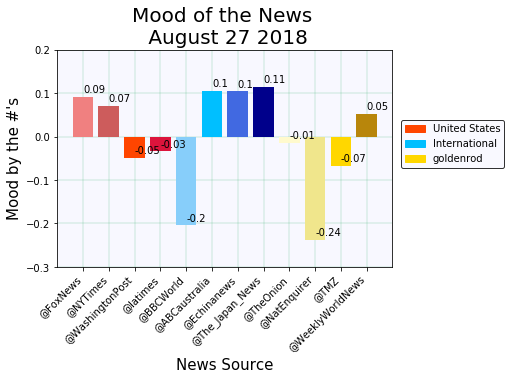

In [9]:
fig, ax = plt.subplots()


# set face color of graph
ax.set_facecolor("ghostwhite")
plt.ylim(-.30, .2)

# set up grid lines and set behind graph
plt.grid(color = "mediumseagreen", linewidth = .25)
ax.set_axisbelow(True)

# rotate x-axis labels so they fit
plt.xticks(rotation = 45, horizontalalignment = "right")

# set labels for title, x-axis and y-axis. Include timestamp in title
plt.title(f"Mood of the News \n {timestamp}", fontsize = 20)
plt.xlabel("News Source", fontsize = 15)
plt.ylabel("Mood by the #'s", fontsize = 15)

# set counter to iterate through news twitter account
count = 0

# set up loop to populate graph with each news twitter account
for sentiment in avg_mood:
    plt.text(count, sentiment+.01, str(round(sentiment,2)))
    count += 1

# set up bar chart
plt.bar(np.arange(len(avg_mood)), avg_mood, tick_label = avg_mood.index,
        color = ["lightcoral","indianred","orangered","crimson",
                 "lightskyblue","deepskyblue","royalblue","darkblue",
                 "lemonchiffon","khaki","gold","darkgoldenrod"])
# set up legend keys
red_patch = mpatches.Patch(color = "orangered", label = "United States")
blue_patch = mpatches.Patch(color = "deepskyblue", label = "International")
yellow_patch = mpatches.Patch(color = "gold", label = "goldenrod")

# set up legend
plt.legend(markerfirst = True, handles = [red_patch, blue_patch, yellow_patch],
          fancybox = True, edgecolor = "black", bbox_to_anchor = (1.35, 0.7),
          facecolor = "ghostwhite")

# Save image and show graph
# plt.savefig("mood_images/Mood_of_News_bar1", bbox_inches = "tight", dpi = 100)
plt.show()